# 2. 数据探索

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fangli-Ying/DeepLearning2023/blob/main/chapters/chpt2/Ch2-EDA.ipynb)

在上一章中，我们简要地看了一下目标检测作为一个整体。从这一章开始，我们将认真地开始目标检测方面的工作。提高深度学习模型性能最重要的部分是模型本身，但也是数据集。据说数据科学家在学习深度学习模型时，将超过90%的时间花在数据管理上。数据细化对于避免有偏见、不正确或扭曲的学习结果至关重要。为了使数据细化更容易，使用正确的数据集很重要。
在本章中，我们将探索学习目标检测模型的数据，并对基本边界框进行示意图化。第2.1节将指导您如何下载数据，第2.2节将检查存储在数据集中的信息。而在第2.3节中，我们将继续进行边界框可视化。我们将使用Kaggle中共享的[Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection)数据集。出于教程目的，我们选择了大小合适的数据集，而不是需要大量学习时间的海量数据集。

## 2.1. 下载数据集

首先，让我们下载用于学习的数据集。您可以使用假实验室提供的数据加载器功能轻松下载数据。我们将使用 'git clone' 命令将 Tutory-Book-Utils 存储库下载到 Colab 环境中。

In [1]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

'git' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [2]:
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection

python: can't open file 'd:\3000-code\deeplearning\DeepLearning2023\Deeplearning\chapters\chpt2\Tutorial-Book-Utils\PL_data_loader.py': [Errno 2] No such file or directory


如上图所示，可以看到已经下载了Face MaskDetection.zip文件。接下来，让我们使用Linux命令unzip解压缩压缩文件。您可以使用-q选项控制不必要的输出。

In [3]:
!unzip -q Face\ Mask\ Detection.zip

'unzip' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


如果查看 Colab 路径，可以确认如图片 2-1 所示，创建了“annotations”文件夹和“images”文件夹。“annotations”文件夹中存储着每张图像的医用口罩位置坐标，“images”文件夹中存储着图像。

![dataset example](../../figures/chapter2/OD-ch2img02.PNG)

- 图 2-1 实验的文件夹路径

## 2.2. 检查数据集

如果您查看面罩检测数据集，有两个文件夹：“图像”和“注释”。“图像”文件夹包含从0到852的图像文件，“注释”文件夹包含从0到852的xml文件。
“注释”文件夹中的xml文件包含有关每个图像文件的信息。例如，让我们看一下maksssksksss307. xml文件。

In [4]:
<annotation>
    <folder>images</folder>
    <filename>maksssksksss307.png</filename>
    <size>
        <width>400</width>
        <height>226</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>mask_weared_incorrect</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>3</xmin>
            <ymin>65</ymin>
            <xmax>96</xmax>
            <ymax>163</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>146</xmin>
            <ymin>28</ymin>
            <xmax>249</xmax>
            <ymax>140</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>287</xmin>
            <ymin>180</ymin>
            <xmax>343</xmax>
            <ymax>225</ymax>
        </bndbox>
    </object>
</annotation>

SyntaxError: invalid syntax (3129829206.py, line 1)


如果您查看文件内容，您可以看到最初显示了文件夹名称和文件名，并且包含了图像大小信息。现在，如果您查看 “object” 中的代码，您可以看到它分为三类：“mask_weared_incorrect”、“with_mask” 和 “without_mask”。在 “mask_weared_incorrect” 的情况下，有关未正确蒙版的对象的信息，“with_mask” 包含有关戴蒙版的对象的位置的信息，“without_mask” 包含有关未蒙版的对象的信息。如果一个图像文件中有两个戴蒙版的对象，您将看到有两个 “object” 包含 “with_mask” 的信息。在 “bndbox” 中，您可以看到 “xmin”、“ymin”、“xmax” 和 “ymax” 按该顺序出现。这是指定边界框区域的信息。


![dataset example](../../figures/chapter2/OD-ch2img01.PNG)

- 图 2-2 maksssksksss307. png 文件的可视化


图 2-2 是 maksssksksss307. xml 文件描述的 maksssksksss307.png 图像文件。 `object`从 X 坐标最左边开始依次为  `mask_weared_incorrect`, `with_mask`, `without_mask`就像出现的那样，在该图像文件中也可以确认未正确佩戴口罩的对象、佩戴口罩的对象以及未佩戴口罩的对象从 X 坐标左边开始依次出现。

## 2.3. 边界框图示化

数据集验证对于提高深度学习模型准确性很重要在监督学习中，模型从标记的数据中学习，因此确保数据被正确标记很重要。在本节中，我们将可视化给定图像上的边界框，以检查数据是否被正确标记

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

为了测试边界框可视化代码，导入上述包。matplotlib 是可视化的典型包，glob 包是在处理文件时广泛使用的包。BeautifulSoup 是用于解析 HTML 和 XML 文档文件的包，在网络爬虫中很有用。

In [ ]:
img_list = sorted(glob.glob('images/*'))
annot_list = sorted(glob.glob('annotations/*'))

使用Globb包加载数据集。必须在数据集所在的位置指定文件夹路径。此外，使用'sorted'函数确保'img_list'中文件的id顺序与'annot_list'中文件的id顺序相同。 

In [ ]:
print(len(img_list))
print(len(annot_list))

853
853


让我们使用 Python 的 'len' 函数来确定每个文件夹中的文件数。每个文件夹总共加载了 853 条数据。

In [ ]:
print(img_list[:10])
print(annot_list[:10])

['images/maksssksksss0.png', 'images/maksssksksss1.png', 'images/maksssksksss10.png', 'images/maksssksksss100.png', 'images/maksssksksss101.png', 'images/maksssksksss102.png', 'images/maksssksksss103.png', 'images/maksssksksss104.png', 'images/maksssksksss105.png', 'images/maksssksksss106.png']
['annotations/maksssksksss0.xml', 'annotations/maksssksksss1.xml', 'annotations/maksssksksss10.xml', 'annotations/maksssksksss100.xml', 'annotations/maksssksksss101.xml', 'annotations/maksssksksss102.xml', 'annotations/maksssksksss103.xml', 'annotations/maksssksksss104.xml', 'annotations/maksssksksss105.xml', 'annotations/maksssksksss106.xml']


现在让我们检查每个文件夹中的文件是否正确。[： 10]从一开始总共打印10个文件名。这里需要注意的一点是，您需要确保输出文件按顺序出现。如果输出不按顺序，则图像文件和边界框文件的顺序交织在一起，导致边界框无法正确显示。由于上面使用'sorted'函数加载了'img_list'和'annot_list'，您可以看到文件的id顺序是相同的。


现在让我们定义一个用于边界框可视化的函数。

In [ ]:
def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image(img_path, annotation):
    
    img = mpimg.imread(img_path)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)

    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

上述代码共定义了 4 个函数。首先，通过generate_box函数来指定返回xmin、ymin、xmax、ymax这些值。generate_label函数将是否佩戴口罩的情况分为三个阶段，并返回 0、1、2 这几个值。对于with_mask（佩戴口罩）的情况返回 1，对于mask_weared_incorrect（口罩佩戴不正确）的情况返回 2，其余情况也就是without_mask（未佩戴口罩）时返回 0。
generate_target函数是分别调用generate_box和generate_label函数，将返回的值存储在字典中再返回的函数。它利用html.parser来加载注释文件中的内容，并提取目标的边界框和标签。plot_image函数是将图像和边界框一起进行可视化展示的函数。佩戴口罩时绘制绿色边界框，口罩佩戴不正确时绘制橙色边界框，未佩戴口罩时绘制红色边界框。

In [ ]:
img_list.index('images/maksssksksss307.png') 

232

上面的代码是查找maksssksksss307. png文件的索引值。您可以使用'index'函数检查maksssksksss307.png文件位置的索引值。

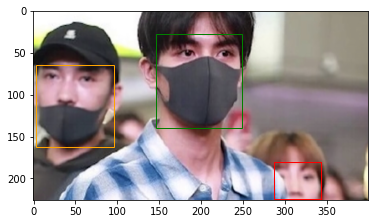

In [ ]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)

通过plot_image函数将边界框在图像上进行可视化展示。利用generate_target函数把与maksssksksss307.png文件相对应的边界框信息存储在bbox中。然后将边界框信息连同该图像文件信息一并传递给plot_image函数，从而进行可视化操作。img_list[]和annot_list[]中的数字表示的是maksssksksss307.png文件的位置，所以会填入相同的数字。
在本章节中，我们进行了通过对数据集进行探索来确认边界框的实践操作。在下一章节中，我们将对用于使数据集能够进行学习的数据预处理过程展开探讨。